In [7]:
import tensorflow as tf
import tensorflow_datasets as ftds

In [8]:
datos, metadatos = ftds.load('mnist', as_supervised=True, with_info=True)

c:\Users\AIO-ALUM-035\anaconda3\envs\clase\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:01<00:03,  1.03s/ url]

Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.90 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.58 url/s]
                                                                        

Dataset mnist downloaded and prepared to C:\Users\AIO-ALUM-035\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [12]:
datos_entrenamiento = datos['train']
datos_prueba = datos['test']

In [9]:
nombres_clases = metadatos.features['label'].names

In [15]:
def normalizar (imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes = imagenes / 255.0
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)

datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()


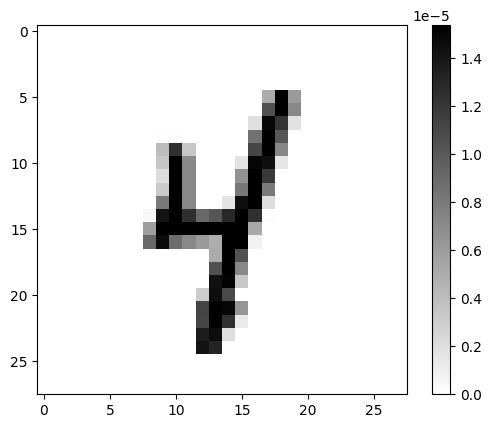

In [18]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

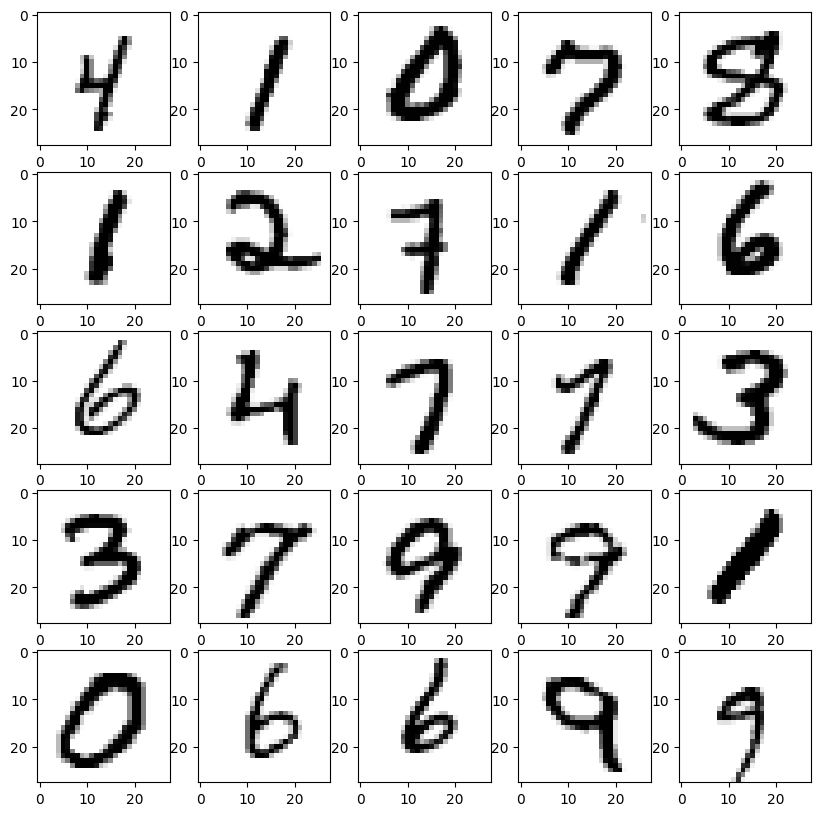

In [22]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5,5, i +1)
    plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [23]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

c:\Users\AIO-ALUM-035\anaconda3\envs\clase\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
modelo.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [25]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_prueba = datos_prueba.batch(TAMANO_LOTE)

In [28]:
import math

entrenamineto = modelo.fit(datos_entrenamiento, epochs = 10, steps_per_epoch=math.ceil(60000 / TAMANO_LOTE))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1117 - loss: 2.3015
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1120 - loss: 2.3016
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1145 - loss: 2.3009
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1116 - loss: 2.3016
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1130 - loss: 2.3014
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1116 - loss: 2.3013
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1113 - loss: 2.3015
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1116 - loss: 2.3014
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1122 - loss: 2.3013
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1135 - loss: 2.3012
